# Runs file structure tests

In [1]:
import time

# Load run 

File structure: `/runs/<exp_name>/YYYY-MM-DD_HH-MM-SS/`
```
├── checkpoints
│   ├── ac_weights_000000.pt  # contains weights of both estimator and policy
│   ├── ac_weights_000400.pt  # model saved every 400 iter
│   │   ...  
│   ├── ac_weights_<iteration>.pt  # model saved every 400 iter
│   │   ...
│   ├── ac_weights_last.pt
│   ├── (adaptation_module_xxxxxx.jit)  # created on demandin  post-processing
│   ├── (body_xxxxx.jit)
│   │   ...
│   ├── adaptation_module_latest.jit # torch jit script of estimator
│   ├── body_latest.jit # torch jit script of main policy
│
├── curriculum
│   ├── distribution.pkl
│   └── info.pkl
│
├── videos
│   ├── <iteration>.mp4
│   ... 
│
├── .charts.yaml    # indicates what to show in ml_dash app
├── metrics.pkl     # logged metrics (used by ml_dash app)
├── parameters.pkl  # all the training parameters 
└── outputs.log     # history of logged text
```

adaptation_module_xxxxxx.jit and body_xxxxx.jit can be converted from ac_weights_xxxxx.jit (using parameters.pkl). See scripts/play_test.py.

In [2]:
import glob
#import pickle as pkl

import torch # should be 1.10: conda install pytorch==1.10.1 torchvision==0.11.2 torchaudio==0.10.1 -c pytorch




In [3]:
# TODO: convert_weights_to_jit

In [4]:
runs_dir = "../test"
exp_name = "gait-conditioned-agility"
run_timestamp = "2023-05-25/train_test/085933.593006" #to change into YYYY-MM-DD_HH-MM-SS

run_path = f"{runs_dir}/{exp_name}/{run_timestamp}"

In [5]:
glob.glob(run_path+"/*")

['../test/gait-conditioned-agility/2023-05-25/train_test/085933.593006/metrics.pkl',
 '../test/gait-conditioned-agility/2023-05-25/train_test/085933.593006/videos',
 '../test/gait-conditioned-agility/2023-05-25/train_test/085933.593006/checkpoints',
 '../test/gait-conditioned-agility/2023-05-25/train_test/085933.593006/curriculum',
 '../test/gait-conditioned-agility/2023-05-25/train_test/085933.593006/outputs.log',
 '../test/gait-conditioned-agility/2023-05-25/train_test/085933.593006/parameters.pkl']

## Load parameters

parameters.pkl is generated with logger.log_params(AC_Args=vars(AC_Args), PPO_Args=vars(PPO_Args), RunnerArgs=vars(RunnerArgs),Cfg=vars(Cfg))

In [8]:
import io
import pickle
# if want to unpickle the parameters.pkl file on a GPU-less machine, you need to use a customm upickler
# https://github.com/pytorch/pytorch/issues/16797
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)


In [23]:
with open(run_path + "/parameters.pkl", 'rb') as file:
    pkl_cfg = CPU_Unpickler(file).load()
    
print(pkl_cfg.keys())
cfg = pkl_cfg["Cfg"]
print(cfg.keys())

dict_keys(['AC_Args', 'PPO_Args', 'RunnerArgs', 'Cfg'])
dict_keys(['env', 'terrain', 'commands', 'curriculum_thresholds', 'init_state', 'control', 'asset', 'domain_rand', 'rewards', 'reward_scales', 'normalization', 'obs_scales', 'noise', 'noise_scales', 'viewer', 'sim', 'command_ranges'])


In [24]:
from go1_gym.envs.base.legged_robot_config import Cfg
vars(Cfg)

# substitute default parameters with loaded ones
# for key, value in cfg.items():
#    if hasattr(Cfg, key):
#        for key2, value2 in cfg[key].items():
#            setattr(getattr(Cfg, key), key2, value2)

{'env': {'num_envs': 4000,
  'num_observations': 70,
  'num_scalar_observations': 70,
  'num_privileged_obs': 2,
  'privileged_future_horizon': 1,
  'num_actions': 12,
  'num_observation_history': 5,
  'env_spacing': 3.0,
  'send_timeouts': True,
  'episode_length_s': 20,
  'observe_vel': False,
  'observe_only_ang_vel': False,
  'observe_only_lin_vel': False,
  'observe_yaw': False,
  'observe_contact_states': False,
  'observe_command': True,
  'observe_height_command': False,
  'observe_gait_commands': True,
  'observe_timing_parameter': False,
  'observe_clock_inputs': True,
  'observe_two_prev_actions': True,
  'observe_imu': False,
  'record_video': True,
  'recording_width_px': 360,
  'recording_height_px': 240,
  'recording_mode': 'COLOR',
  'num_recording_envs': 1,
  'debug_viz': False,
  'all_agents_share': False,
  'priv_observe_friction': True,
  'priv_observe_friction_indep': False,
  'priv_observe_ground_friction': False,
  'priv_observe_ground_friction_per_foot': False,


## Load metrics

In [203]:
from ml_logger import logger
import pandas as pd


# return pandas dataframe of metrics
metrics_pkl_file = run_path + "/metrics.pkl"
metrics_df = logger.read_metrics(path = metrics_pkl_file)[metrics_pkl_file]

In [204]:
# list all column names
metrics_df.columns.tolist()

['train/episode/rew_tracking_lin_vel/mean',
 'train/episode/rew_tracking_ang_vel/mean',
 'train/episode/rew_lin_vel_z/mean',
 'train/episode/rew_ang_vel_xy/mean',
 'train/episode/rew_torques/mean',
 'train/episode/rew_dof_vel/mean',
 'train/episode/rew_dof_acc/mean',
 'train/episode/rew_collision/mean',
 'train/episode/rew_action_rate/mean',
 'train/episode/rew_tracking_contacts_shaped_force/mean',
 'train/episode/rew_tracking_contacts_shaped_vel/mean',
 'train/episode/rew_jump/mean',
 'train/episode/rew_dof_pos_limits/mean',
 'train/episode/rew_feet_slip/mean',
 'train/episode/rew_feet_clearance_cmd_linear/mean',
 'train/episode/rew_action_smoothness_1/mean',
 'train/episode/rew_action_smoothness_2/mean',
 'train/episode/rew_raibert_heuristic/mean',
 'train/episode/rew_orientation_control/mean',
 'train/episode/rew_total/mean',
 'train/episode/min_command_duration/mean',
 'train/episode/max_command_duration/mean',
 'train/episode/min_command_bound/mean',
 'train/episode/max_command_bo

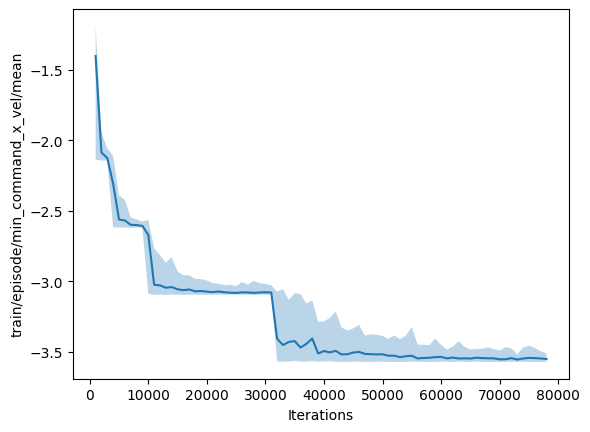

In [205]:
from matplotlib import pyplot as plt

# metrics_df['train/episode/rew_tracking_lin_vel/mean'].plot()


window_size = 100
label = 'train/episode/min_command_x_vel/mean'
#label = 'train/episode/rew_total/mean'
y = metrics_df[label].rolling(window=window_size).mean()


# Calculate the maximum and minimum of the unsmoothed signal
max_values = metrics_df[label].rolling(window=window_size).max()
min_values = metrics_df[label].rolling(window=window_size).min()


plt.plot(metrics_df['iterations'][::window_size],y[::window_size])

#plt.fill_between(metrics_df['iterations'], min_values, max_values, where=(min_values <= max_values), alpha=0.3, interpolate=True, label='Range')
plt.fill_between(metrics_df['iterations'][::window_size], min_values[::window_size], max_values[::window_size], alpha=0.3, interpolate=True, label='Range')

#plt.plot(metrics_df['iterations'][::window_size],min_values[::window_size])
#plt.plot(metrics_df['iterations'][::window_size],max_values[::window_size])
#plt.plot(metrics_df['iterations'],min_values)
#plt.plot(metrics_df['iterations'],max_values)



#plt.ylim(y.min(),max_values.max())

# Add labels and title
plt.xlabel('Iterations')
plt.ylabel(label)
#plt.title('Smoothed Plot with Range')

plt.show()

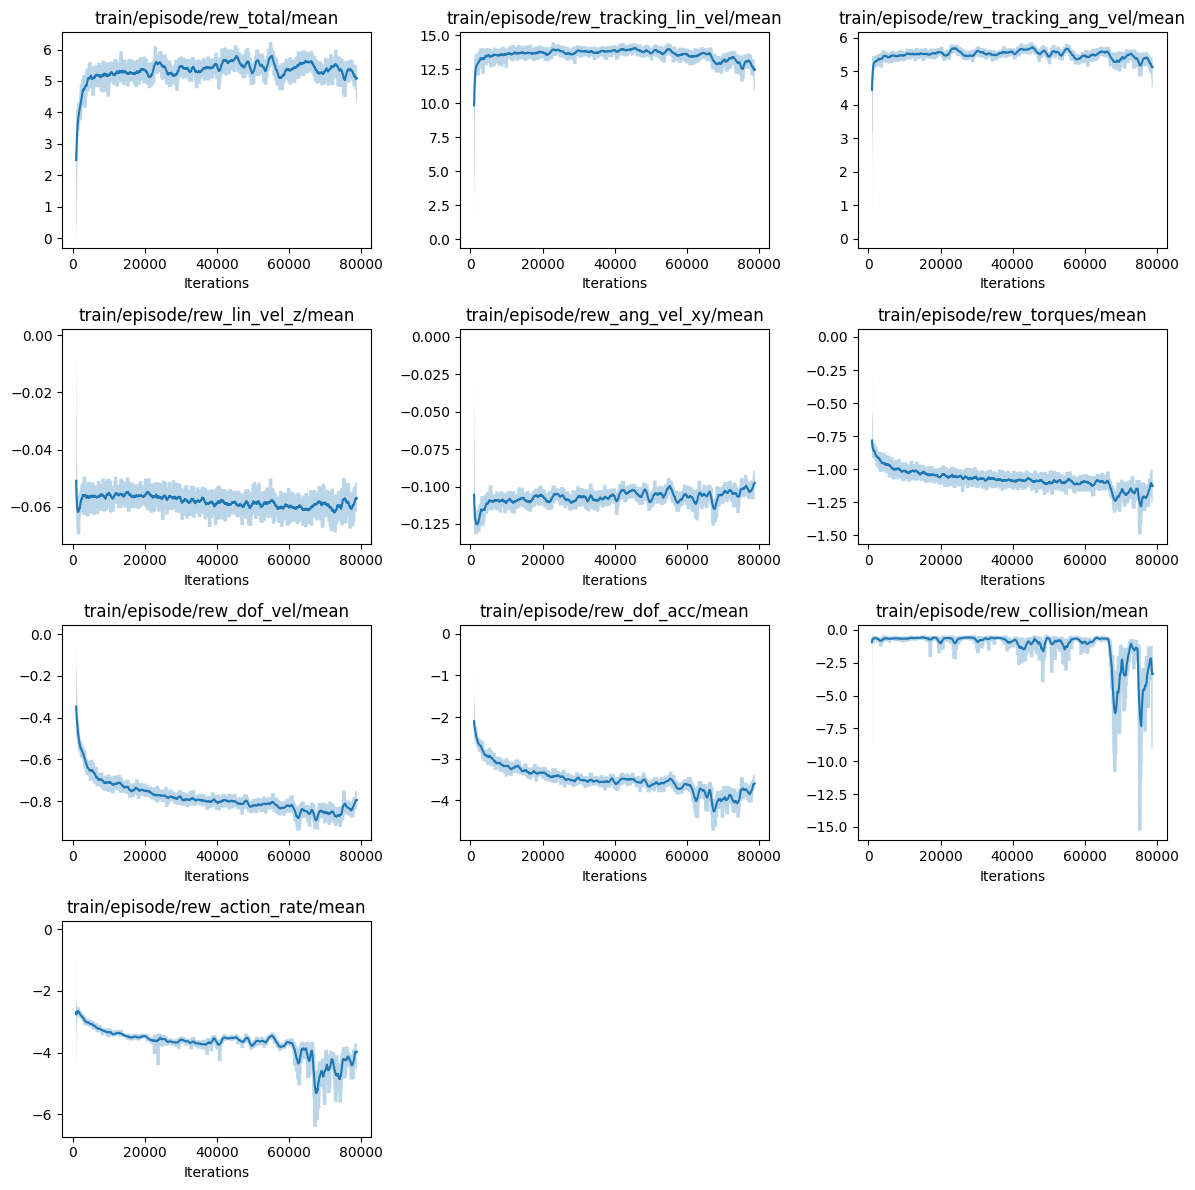

In [207]:
# Define the labels for each graph
labels = [
    'train/episode/rew_total/mean',
    'train/episode/rew_tracking_lin_vel/mean',
    'train/episode/rew_tracking_ang_vel/mean',
    'train/episode/rew_lin_vel_z/mean',
    'train/episode/rew_ang_vel_xy/mean',
    'train/episode/rew_torques/mean',
    'train/episode/rew_dof_vel/mean',
    'train/episode/rew_dof_acc/mean',
    'train/episode/rew_collision/mean',
    'train/episode/rew_action_rate/mean'
]

# Set the window size for the rolling mean calculation
window_size = 100

# Set the number of rows and columns for subplots
num_rows = (len(labels) - 1) // 3 + 1
num_cols = min(len(labels), 3)

# Create the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 12))

# Flatten the axes array
axes = axes.flatten()

# Plot each graph
for i, label in enumerate(labels):
    ax = axes[i]
    
    # Calculate the rolling mean
    y = metrics_df[label].rolling(window=window_size).mean()
    
    # Calculate the maximum and minimum of the unsmoothed signal
    max_values = metrics_df[label].rolling(window=window_size).max()
    min_values = metrics_df[label].rolling(window=window_size).min()
    
    # Plot the rolling mean
    ax.plot(metrics_df['iterations'], y)
    
    # Fill the shaded area
    ax.fill_between(metrics_df['iterations'], min_values, max_values, alpha=0.3, interpolate=True, label='Range')
    
    # Set the x-axis label
    ax.set_xlabel('Iterations')
    
    # Set the y-axis label
    # ax.set_ylabel(label)
    
    # Set the title
    # ax.set_title('Plot: {}'.format(label))
    ax.set_title(label)
    
    # Add legend
    # ax.legend()

# Remove any unused subplots
if len(labels) < len(axes):
    for j in range(len(labels), len(axes)):
        fig.delaxes(axes[j])

# Adjust spacing and layout
fig.tight_layout()

# Show the plot
plt.show()

# Other tests

In [23]:
datetime = time.strftime("%Y-%m-%d_%H-%M-%S")
print(datetime)

2023-06-13_00-13-18


In [24]:
label = "gait-conditioned-agility/pretrain-v0"
logdir = f"../runs/{label}"
with open(logdir+"/parameters.pkl", 'rb') as file:
    print(file)

<_io.BufferedReader name='../runs/gait-conditioned-agility/pretrain-v0/parameters.pkl'>
